In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
from datetime import date

def calculate_age(born):
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

In [3]:
def remove_cha(string):
    return string[:3]

In [4]:
parse_cols = [1, 3, 4, 14, 15, 16, 17, 25, 29, 30, 31, 32, 33, 34, 38]
offshore_df = pd.read_excel('../data/帳戶schema.xlsx', sheet_name = "offshore_Data", usecols = parse_cols)
offshore_df

,accountid,gendercode,birthdate,censuspostcode,censusaddress,address1_postcode,address1_composite,forinspection,agentcode,agentname,institutioncode,institutionname,salescode,salesname,accountdate
0,936077,F,1965-03-31,231,新北市************************,231,新北市***************************,N,LF00000001,壽Ｏ通路投信,D4110,北區壽險組,LF00000001,壽Ｏ通路投信,1996-11-11
1,1046036,M,1958-11-18,,************************,103,台北市***************************,Y,B0059,許Ｏ容,D4110,北區壽險組,B0059,許Ｏ容,2000-01-14
2,1069189,M,1966-11-22,116,台北市************************,116,台北市***************************,N,B0264,黃Ｏ菁,D4110,北區壽險組,B0264,黃Ｏ菁,1996-10-16
3,1080213,M,1947-11-20,11565,台北市************************,11565,台北市***************************,N,B0264,黃Ｏ菁,D4110,北區壽險組,B0264,黃Ｏ菁,1996-11-04
4,1226301,M,1956-07-12,,************************,106,台北市***************************,Y,B0059,許Ｏ容,D4110,北區壽險組,B0059,許Ｏ容,2000-02-23
5,1226307,F,1956-08-06,,新竹市************************,300,新竹市***************************,N,B0165,賴Ｏ伶,D4110,北區壽險組,B0165,賴Ｏ伶,1993-04-19
6,1226322,M,1934-02-23,104,寶來投************************,104,寶來投***************************,N,LF00000001,壽Ｏ通路投信,D4110,北區壽險組,LF00000001,壽Ｏ通路投信,1996-01-15
7,1226328,F,1965-02-09,,安泰心************************,,安泰心***************************,N,LF00000001,壽Ｏ通路投信,D4110,北區壽險組,LF00000001,壽Ｏ通路投信,1996-03-05
8,1226387,M,1997-12-30,,************************,330,桃園市***************************,Y,LF00000001,壽Ｏ通路投信,D4110,北區壽險組,LF00000001,壽Ｏ通路投信,2000-03-01
9,1226406,F,1951-03-18,,************************,806,高雄市***************************,Y,B0059,許Ｏ容,D4110,北區壽險組,B0059,許Ｏ容,2000-01-26


In [5]:
#add formatted date colum
offshore_df['new_birthdate'] = pd.to_datetime(offshore_df['birthdate'].astype(str), format='%Y-%m-%d')
#calculate age
offshore_df['age'] =  offshore_df['new_birthdate'].apply(calculate_age)
offshore_df

,accountid,gendercode,birthdate,censuspostcode,censusaddress,address1_postcode,address1_composite,forinspection,agentcode,agentname,institutioncode,institutionname,salescode,salesname,accountdate,new_birthdate,age
0,936077,F,1965-03-31,231,新北市************************,231,新北市***************************,N,LF00000001,壽Ｏ通路投信,D4110,北區壽險組,LF00000001,壽Ｏ通路投信,1996-11-11,1965-03-31,53.0
1,1046036,M,1958-11-18,,************************,103,台北市***************************,Y,B0059,許Ｏ容,D4110,北區壽險組,B0059,許Ｏ容,2000-01-14,1958-11-18,60.0
2,1069189,M,1966-11-22,116,台北市************************,116,台北市***************************,N,B0264,黃Ｏ菁,D4110,北區壽險組,B0264,黃Ｏ菁,1996-10-16,1966-11-22,52.0
3,1080213,M,1947-11-20,11565,台北市************************,11565,台北市***************************,N,B0264,黃Ｏ菁,D4110,北區壽險組,B0264,黃Ｏ菁,1996-11-04,1947-11-20,71.0
4,1226301,M,1956-07-12,,************************,106,台北市***************************,Y,B0059,許Ｏ容,D4110,北區壽險組,B0059,許Ｏ容,2000-02-23,1956-07-12,62.0
5,1226307,F,1956-08-06,,新竹市************************,300,新竹市***************************,N,B0165,賴Ｏ伶,D4110,北區壽險組,B0165,賴Ｏ伶,1993-04-19,1956-08-06,62.0
6,1226322,M,1934-02-23,104,寶來投************************,104,寶來投***************************,N,LF00000001,壽Ｏ通路投信,D4110,北區壽險組,LF00000001,壽Ｏ通路投信,1996-01-15,1934-02-23,84.0
7,1226328,F,1965-02-09,,安泰心************************,,安泰心***************************,N,LF00000001,壽Ｏ通路投信,D4110,北區壽險組,LF00000001,壽Ｏ通路投信,1996-03-05,1965-02-09,53.0
8,1226387,M,1997-12-30,,************************,330,桃園市***************************,Y,LF00000001,壽Ｏ通路投信,D4110,北區壽險組,LF00000001,壽Ｏ通路投信,2000-03-01,1997-12-30,20.0
9,1226406,F,1951-03-18,,************************,806,高雄市***************************,Y,B0059,許Ｏ容,D4110,北區壽險組,B0059,許Ｏ容,2000-01-26,1951-03-18,67.0


In [6]:
# deal with "*"" in address
offshore_df['censusaddress'] = offshore_df['censusaddress'].apply(remove_cha)
offshore_df['address1_composite'] = offshore_df['address1_composite'].apply(remove_cha)
offshore_df

,accountid,gendercode,birthdate,censuspostcode,censusaddress,address1_postcode,address1_composite,forinspection,agentcode,agentname,institutioncode,institutionname,salescode,salesname,accountdate,new_birthdate,age
0,936077,F,1965-03-31,231,新北市,231,新北市,N,LF00000001,壽Ｏ通路投信,D4110,北區壽險組,LF00000001,壽Ｏ通路投信,1996-11-11,1965-03-31,53.0
1,1046036,M,1958-11-18,,,103,台北市,Y,B0059,許Ｏ容,D4110,北區壽險組,B0059,許Ｏ容,2000-01-14,1958-11-18,60.0
2,1069189,M,1966-11-22,116,台北市,116,台北市,N,B0264,黃Ｏ菁,D4110,北區壽險組,B0264,黃Ｏ菁,1996-10-16,1966-11-22,52.0
3,1080213,M,1947-11-20,11565,台北市,11565,台北市,N,B0264,黃Ｏ菁,D4110,北區壽險組,B0264,黃Ｏ菁,1996-11-04,1947-11-20,71.0
4,1226301,M,1956-07-12,,,106,台北市,Y,B0059,許Ｏ容,D4110,北區壽險組,B0059,許Ｏ容,2000-02-23,1956-07-12,62.0
5,1226307,F,1956-08-06,,新竹市,300,新竹市,N,B0165,賴Ｏ伶,D4110,北區壽險組,B0165,賴Ｏ伶,1993-04-19,1956-08-06,62.0
6,1226322,M,1934-02-23,104,寶來投,104,寶來投,N,LF00000001,壽Ｏ通路投信,D4110,北區壽險組,LF00000001,壽Ｏ通路投信,1996-01-15,1934-02-23,84.0
7,1226328,F,1965-02-09,,安泰心,,安泰心,N,LF00000001,壽Ｏ通路投信,D4110,北區壽險組,LF00000001,壽Ｏ通路投信,1996-03-05,1965-02-09,53.0
8,1226387,M,1997-12-30,,,330,桃園市,Y,LF00000001,壽Ｏ通路投信,D4110,北區壽險組,LF00000001,壽Ｏ通路投信,2000-03-01,1997-12-30,20.0
9,1226406,F,1951-03-18,,,806,高雄市,Y,B0059,許Ｏ容,D4110,北區壽險組,B0059,許Ｏ容,2000-01-26,1951-03-18,67.0


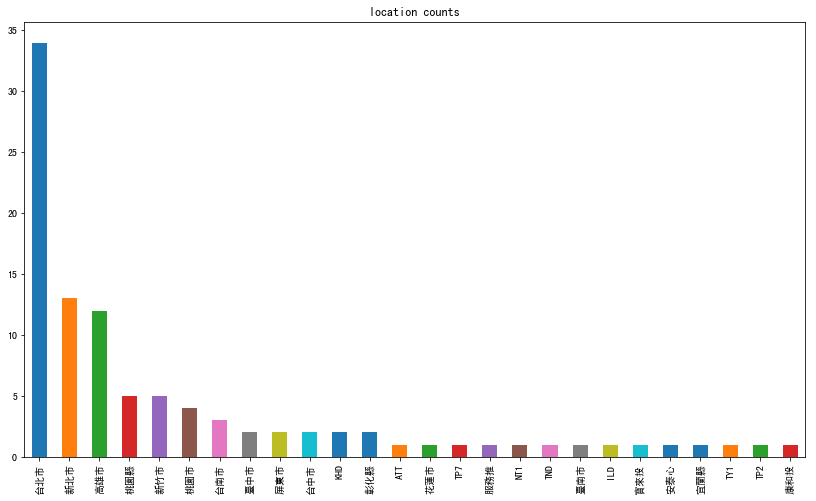

In [7]:
# show customers' living city
loc_counts = offshore_df["address1_composite"].value_counts()
loc_counts.plot.bar(x="City", figsize=(14,8), title="location counts")